<a href="https://colab.research.google.com/github/schauppi/Udemy_TensorFlow_Developer/blob/main/Exam_preparation/nlp_us_airline_tweets.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# US Airline Tweets text classification

In [1]:
#Download helper functions file
!wget https://raw.githubusercontent.com/schauppi/Udemy_TensorFlow_Developer/main/Exam_preparation/helper_functions.py

--2021-09-08 09:05:12--  https://raw.githubusercontent.com/schauppi/Udemy_TensorFlow_Developer/main/Exam_preparation/helper_functions.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5005 (4.9K) [text/plain]
Saving to: ‘helper_functions.py’

helper_functions.py 100%[===================>]   4.89K  --.-KB/s    in 0s      

2021-09-08 09:05:12 (36.2 MB/s) - ‘helper_functions.py’ saved [5005/5005]



## Data preparation

In [2]:
#Download dataset 
!wget https://raw.githubusercontent.com/schauppi/Udemy_TensorFlow_Developer/main/Exam_preparation/Datasets/Tweets.csv

--2021-09-08 09:05:13--  https://raw.githubusercontent.com/schauppi/Udemy_TensorFlow_Developer/main/Exam_preparation/Datasets/Tweets.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3421431 (3.3M) [text/plain]
Saving to: ‘Tweets.csv’

Tweets.csv          100%[===================>]   3.26M  --.-KB/s    in 0.07s   

2021-09-08 09:05:13 (46.8 MB/s) - ‘Tweets.csv’ saved [3421431/3421431]



In [3]:
# Load in the dataset 
import pandas as pd
df = pd.read_csv("/content/Tweets.csv")
df.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [4]:
#How many different sentiments
df.airline_sentiment.value_counts()

negative    9178
neutral     3099
positive    2363
Name: airline_sentiment, dtype: int64

In [5]:
#Visualize some random examples
import random
random_index = random.randint(0, len(df)-5)
for row in df[["text", "airline_sentiment"]][random_index:random_index+5].itertuples():
  _, text, sentiment = row
  print(f"Text: {text}")
  print(f"Rating: {sentiment}\n")

Text: @AmericanAir thanks for keeping us safe
Rating: positive

Text: @AmericanAir There was no one from #AA at the #woase2015 event @HelsinkiAirport
Lots of info available of #winterops
Rating: negative

Text: @AmericanAir is that the "record locator"?
Rating: neutral

Text: @AmericanAir you keep returning my call and hanging up when I answer? Help reFlight Booking Problems a flight!
Rating: negative

Text: @AmericanAir been calling for over 24hrs now and getting no where but told to call back by the automated system is extremely frustrating
Rating: negative



## Remove different strings

In [6]:
# Remove Smileys, @, # and links
import re
emoji_pattern = re.compile("["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           "]+", flags=re.UNICODE)

for index, row in enumerate(df["text"]):
  row = re.sub(r'http\S+', '', row)
  row = re.sub(r'@', '', row)
  row = re.sub(r'#', '', row)
  row = emoji_pattern.sub(r'', row)
  df["text"][index] = row

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app


In [7]:
#Visualize some random examples after cleaning
import random
random_index = random.randint(0, len(df)-5)
for row in df[["text", "airline_sentiment"]][random_index:random_index+5].itertuples():
  _, text, sentiment = row
  print(f"Text: {text}")
  print(f"Rating: {sentiment}\n")

Text: USAirways why is it impossible to change / buy preferred seats via your app?
Rating: negative

Text: USAirways I am good. I just did not understand the terminology.  but the merger brings new verbiage
Rating: neutral

Text: USAirways can you priv chat to help chairman reroute
Rating: neutral

Text: USAirways New marketing song?  let us know what you think? 
Rating: neutral

Text: USAirways why are your customer service department so intent on ignoring my emails and queries? badservice usairways
Rating: negative



## Remove stopwords

In [8]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
STOPWORDS = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [9]:
df["text_stopwords"] = df["text"].apply(lambda x: ' '.join([word for word in x.split() if word not in (STOPWORDS)]))

In [10]:
#Visualize some random examples after removing stop words
import random
random_index = random.randint(0, len(df)-5)
for row in df[["text_stopwords", "airline_sentiment"]][random_index:random_index+5].itertuples():
  _, text, sentiment = row
  print(f"Text: {text}")
  print(f"Rating: {sentiment}\n")

Text: AmericanAir called back put hold. It's midnight. Literally want know I'm getting home I'm getting help
Rating: negative

Text: AmericanAir Flight 2390 delayed 14 hours!! No one AmericanAirlines counter tell husband flight! Help???
Rating: negative

Text: AmericanAir happens many times. It's upsetting see poorly airline treats customers
Rating: negative

Text: AmericanAir seriously, reps available take phone calls? Even platinum?
Rating: negative

Text: AmericanAir overall lack attention foresight managing flights.
Rating: negative



## Split dataset

In [11]:
import numpy as np
np.random.seed(42)
perm = np.random.permutation(df.index)
m = len(df)
train_end = int(0.6 * m)
validate_end = int(0.2 * m) + train_end
train = df.iloc[perm[:train_end]]
validate = df.iloc[perm[train_end:validate_end]]
test = df.iloc[perm[validate_end:]]

In [12]:
len(train), len(validate), len(test)

(8784, 2928, 2928)

In [13]:
#Turn dataframes into numpy arrays
train_sentences = train["text_stopwords"].to_numpy()
train_labels = train["airline_sentiment"].to_numpy()
val_sentences = validate["text_stopwords"].to_numpy()
val_labels = validate["airline_sentiment"].to_numpy()
test_sentences = test["text_stopwords"].to_numpy()
test_labels = test["airline_sentiment"].to_numpy()
train_sentences.shape, val_sentences.shape, test_sentences.shape

((8784,), (2928,), (2928,))

## One-hot encode labels

In [14]:
from sklearn.preprocessing import OneHotEncoder
one_hot_encoder = OneHotEncoder(sparse=False)
train_labels_one_hot = one_hot_encoder.fit_transform(train_labels.reshape(-1, 1))
test_labels_one_hot = one_hot_encoder.fit_transform(test_labels.reshape(-1, 1))
val_labels_one_hot = one_hot_encoder.fit_transform(val_labels.reshape(-1, 1))

In [15]:
train_labels_one_hot[:10]

array([[0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.]])

In [16]:
import tensorflow as tf
#Turn data into TensorFlow Datasets
train_dataset = tf.data.Dataset.from_tensor_slices((train_sentences, train_labels_one_hot))
val_dataset = tf.data.Dataset.from_tensor_slices((val_sentences, val_labels_one_hot))
test_dataset = tf.data.Dataset.from_tensor_slices((test_sentences, test_labels_one_hot))

#Prefetch dataset
train_dataset = train_dataset.batch(32).prefetch(tf.data.AUTOTUNE)
val_dataset = val_dataset.batch(32).prefetch(tf.data.AUTOTUNE)
test_dataset = test_dataset.batch(32).prefetch(tf.data.AUTOTUNE)

In [17]:
train_dataset

<PrefetchDataset shapes: ((None,), (None, 3)), types: (tf.string, tf.float64)>

## Create Text Vectorization layers

In [18]:
#Find average number of words in training sentences
sent_len = [len(sentence.split()) for sentence in train_sentences]
avg_sent_len = np.mean(sent_len)
avg_sent_len

11.504895264116575

(array([ 688., 1704., 2360., 2927., 1021.,   81.,    3.]),
 array([ 1.,  5.,  9., 13., 17., 21., 25., 29.]),
 <a list of 7 Patch objects>)

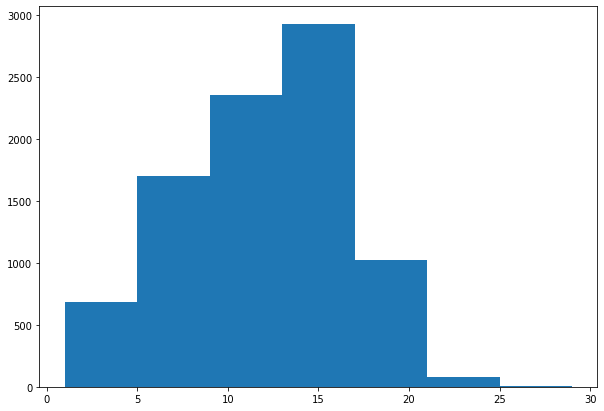

In [19]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,7))
plt.hist(sent_len, bins=7)

In [20]:
# How long of a sentence covers 95% of the lengths?
output_seq_len = int(np.percentile(sent_len, 95))
output_seq_len

18

In [27]:
from tensorflow.keras.layers.experimental.preprocessing import TextVectorization

max_vocab_length = 10000
max_length = output_seq_len

text_vectorizer = TextVectorization(max_tokens=max_vocab_length,
                                    output_mode="int",
                                    output_sequence_length=max_length)

In [31]:
#Fit vectorizer to train sentences
text_vectorizer.adapt(train_sentences)

## Create Embedding layer

In [22]:
from tensorflow.keras import layers

embedding = layers.Embedding(input_dim=max_vocab_length,
                             output_dim=128,
                             embeddings_initializer="uniform",
                             input_length=max_length)

## Modelling experiments

In [23]:
from helper_functions import plot_training_curve

### Model 1: Dense

In [33]:
# Build the model 
inputs = layers.Input(shape=(1,), dtype="string")
x = text_vectorizer(inputs)
x = embedding(x)
x = layers.GlobalAveragePooling1D()(x)
outputs = layers.Dense(3, activation="softmax")(x)
model_1 = tf.keras.Model(inputs, outputs)

In [34]:
# Compile the model 
model_1.compile(loss="categorical_crossentropy", optimizer="Adam", metrics=["accuracy"])

In [35]:
%%time
history_model_1 = model_1.fit(train_dataset,
                              epochs=10,
                              verbose=1,
                              validation_data=val_dataset)

Epoch 1/10
275/275 [==============================] - 5s 9ms/step - loss: 0.8334 - accuracy: 0.6516 - val_loss: 0.7300 - val_accuracy: 0.6759
Epoch 2/10
275/275 [==============================] - 2s 8ms/step - loss: 0.5846 - accuracy: 0.7768 - val_loss: 0.6133 - val_accuracy: 0.7558
Epoch 3/10
275/275 [==============================] - 2s 8ms/step - loss: 0.4470 - accuracy: 0.8421 - val_loss: 0.5649 - val_accuracy: 0.7715
Epoch 4/10
275/275 [==============================] - 2s 8ms/step - loss: 0.3569 - accuracy: 0.8784 - val_loss: 0.5530 - val_accuracy: 0.7773
Epoch 5/10
275/275 [==============================] - 2s 8ms/step - loss: 0.2944 - accuracy: 0.8997 - val_loss: 0.5585 - val_accuracy: 0.7783
Epoch 6/10
275/275 [==============================] - 2s 8ms/step - loss: 0.2476 - accuracy: 0.9192 - val_loss: 0.5740 - val_accuracy: 0.7804
Epoch 7/10
275/275 [==============================] - 2s 8ms/step - loss: 0.2113 - accuracy: 0.9336 - val_loss: 0.5957 - val_accuracy: 0.7804
Epoch 

In [36]:
#Evaluate
model_1.evaluate(test_dataset)

92/92 [==============================] - 0s 4ms/step - loss: 0.6732 - accuracy: 0.7688


[0.6732238531112671, 0.7687841653823853]

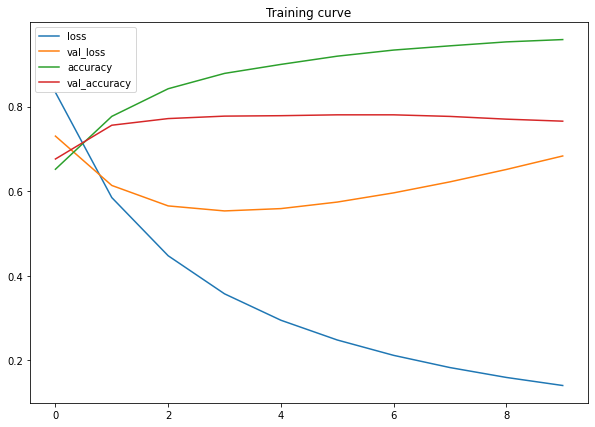

In [37]:
#Plot training curves
plot_training_curve(history_model_1)

### Model 2: Conv1D

In [95]:
# Build the model 
inputs = layers.Input(shape=(1,), dtype=tf.string)
x = text_vectorizer(inputs)
x = embedding(x)
x = layers.Conv1D(filters=8, kernel_size=2, padding="same", activation="relu")(x)
x = layers.Dropout(0.5)(x)
x = layers.GlobalAveragePooling1D()(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(3, activation="softmax")(x)
model_2 = tf.keras.Model(inputs, outputs)

In [96]:
# Compile the model 
model_2.compile(loss="categorical_crossentropy", optimizer="Adam", metrics=["accuracy"])

In [97]:
%%time
history_model_2 = model_2.fit(train_dataset,
                              epochs=500,
                              verbose=1,
                              validation_data=val_dataset,
                              callbacks=[tf.keras.callbacks.ReduceLROnPlateau(monitor="val_loss", patience=5, verbose=1),
                                         tf.keras.callbacks.EarlyStopping(monitor="val_loss", patience=10, restore_best_weights=True, verbose=1)])

Epoch 1/500
275/275 [==============================] - 3s 10ms/step - loss: 0.6160 - accuracy: 0.7021 - val_loss: 0.7484 - val_accuracy: 0.6991
Epoch 2/500
275/275 [==============================] - 2s 9ms/step - loss: 0.4859 - accuracy: 0.7853 - val_loss: 0.7726 - val_accuracy: 0.7025
Epoch 3/500
275/275 [==============================] - 2s 9ms/step - loss: 0.4647 - accuracy: 0.7994 - val_loss: 0.8141 - val_accuracy: 0.7005
Epoch 4/500
275/275 [==============================] - 2s 9ms/step - loss: 0.4463 - accuracy: 0.8081 - val_loss: 0.8487 - val_accuracy: 0.6988
Epoch 5/500
275/275 [==============================] - 2s 9ms/step - loss: 0.4352 - accuracy: 0.8173 - val_loss: 0.8947 - val_accuracy: 0.7039
Epoch 6/500
275/275 [==============================] - 2s 9ms/step - loss: 0.4179 - accuracy: 0.8279 - val_loss: 0.9167 - val_accuracy: 0.6988

Epoch 00006: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.
Epoch 7/500
275/275 [==============================] - 2s 9

In [98]:
#Evaluate
model_2.evaluate(test_dataset)

92/92 [==============================] - 0s 4ms/step - loss: 0.7158 - accuracy: 0.7141


[0.7157864570617676, 0.7141393423080444]

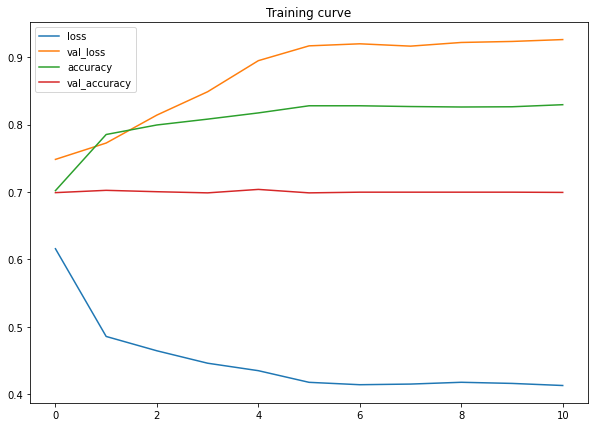

In [99]:
#Plot training curves
plot_training_curve(history_model_2)

### Model 3: LSTM

In [110]:
# Build the model 
inputs = layers.Input(shape=(1,), dtype=tf.string)
x = text_vectorizer(inputs)
x = embedding(x)
x = layers.LSTM(8)(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(3, activation="softmax")(x)
model_3 = tf.keras.Model(inputs, outputs)

In [111]:
# Compile the model 
model_3.compile(loss="categorical_crossentropy", optimizer="Adam", metrics=["accuracy"])

In [112]:
%%time
history_model_3 = model_3.fit(train_dataset,
                              epochs=500,
                              verbose=1,
                              validation_data=val_dataset,
                              callbacks=[tf.keras.callbacks.ReduceLROnPlateau(monitor="val_loss", patience=5, verbose=1),
                                         tf.keras.callbacks.EarlyStopping(monitor="val_loss", patience=10, restore_best_weights=True, verbose=1)])

Epoch 1/500
275/275 [==============================] - 6s 14ms/step - loss: 0.4908 - accuracy: 0.8241 - val_loss: 0.8150 - val_accuracy: 0.7456
Epoch 2/500
275/275 [==============================] - 3s 12ms/step - loss: 0.2269 - accuracy: 0.9406 - val_loss: 0.9163 - val_accuracy: 0.7305
Epoch 3/500
275/275 [==============================] - 3s 12ms/step - loss: 0.1717 - accuracy: 0.9565 - val_loss: 1.0358 - val_accuracy: 0.7370
Epoch 4/500
275/275 [==============================] - 3s 12ms/step - loss: 0.1459 - accuracy: 0.9644 - val_loss: 1.1697 - val_accuracy: 0.7374
Epoch 5/500
275/275 [==============================] - 3s 12ms/step - loss: 0.1307 - accuracy: 0.9671 - val_loss: 1.2101 - val_accuracy: 0.7435
Epoch 6/500
275/275 [==============================] - 3s 12ms/step - loss: 0.1186 - accuracy: 0.9720 - val_loss: 1.2645 - val_accuracy: 0.7312

Epoch 00006: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.
Epoch 7/500
275/275 [==============================] -

In [113]:
#Evaluate
model_3.evaluate(test_dataset)

92/92 [==============================] - 0s 5ms/step - loss: 0.8038 - accuracy: 0.7439


[0.8038120865821838, 0.743852436542511]

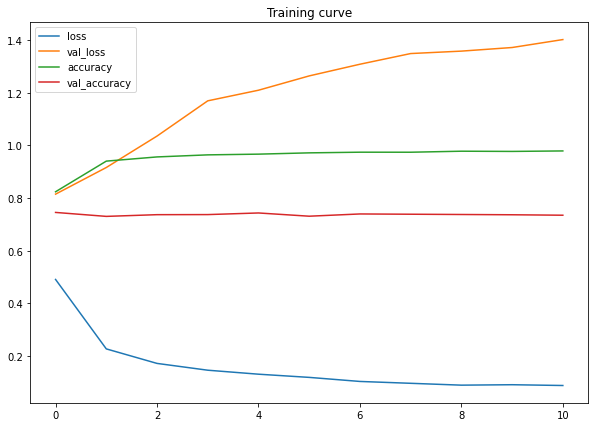

In [114]:
#Plot training curves
plot_training_curve(history_model_3)